<a href="https://colab.research.google.com/github/jeyefsiii/LE2_Clemente_J/blob/main/JFC_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
pip install ucimlrepo

In [55]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [56]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
tic_tac_toe_endgame = fetch_ucirepo(id=101)

# data (as pandas dataframes)
X = tic_tac_toe_endgame.data.features
y = tic_tac_toe_endgame.data.targets

# metadata
print(tic_tac_toe_endgame.metadata)

# variable information
print(tic_tac_toe_endgame.variables)

{'uci_id': 101, 'name': 'Tic-Tac-Toe Endgame', 'repository_url': 'https://archive.ics.uci.edu/dataset/101/tic+tac+toe+endgame', 'data_url': 'https://archive.ics.uci.edu/static/public/101/data.csv', 'abstract': 'Binary classification task on possible configurations of tic-tac-toe game', 'area': 'Games', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 958, 'num_features': 9, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1991, 'last_updated': 'Mon Aug 19 1991', 'dataset_doi': '10.24432/C5688J', 'creators': ['David Aha'], 'intro_paper': None, 'additional_info': {'summary': 'This database encodes the complete set of possible board configurations at the end of tic-tac-toe games, where "x" is assumed to have played first.  The target concept is "win for x" (i.e., true when "x" has one of 8 possible ways to create a "three

In [57]:
# Combine both variables in a single dataframe to evalute
frames = [X, y]
data = pd.concat(frames, axis=1)
data.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [58]:
# Check for duplicates
duplicates = data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Display duplicate rows if any
if duplicates.sum() > 0:
    print(data[duplicates])

Number of duplicate rows: 0


In [59]:
# Encode the categorical features
label_encoders = {}
for column in X.columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

<ipython-input-59-de3567c87dde>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
<ipython-input-59-de3567c87dde>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
<ipython-input-59-de3567c87dde>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [60]:
# Encode the target variable
y = y['class'].map({'positive': 1, 'negative': 0})

In [75]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [63]:
# Split the data into training and testing sets

#For SVC
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X, y, test_size=0.2, random_state=42)

#For AdaBoost
X_train_ab, X_test_ab, y_train_ab, y_test_ab = train_test_split(X, y, test_size=0.2, random_state=24)  # Different random state

In [64]:
svc = SVC(kernel='rbf', probability=True)
svc.fit(X_train_svc, y_train_svc)

SVC(probability=True)

In [65]:
from sklearn.ensemble import AdaBoostClassifier

ab_classifier = AdaBoostClassifier()
ab_classifier.fit(X_train_ab, y_train_ab)

AdaBoostClassifier()

In [66]:
# Predict and evaluate SVC
y_pred_svc = svc.predict(X_test_svc)
y_pred_proba_svc = svc.predict_proba(X_test_svc)[:, 1]

print("SVC Model")
print(f"Accuracy: {accuracy_score(y_test_svc, y_pred_svc)}")
print(classification_report(y_test_svc, y_pred_svc))
print(f"ROC-AUC: {roc_auc_score(y_test_svc, y_pred_proba_svc)}")

SVC Model
Accuracy: 0.8802083333333334
              precision    recall  f1-score   support

           0       1.00      0.66      0.79        67
           1       0.84      1.00      0.92       125

    accuracy                           0.88       192
   macro avg       0.92      0.83      0.85       192
weighted avg       0.90      0.88      0.87       192

ROC-AUC: 0.9728955223880598


ROC-AUC: 0.9728955223880598

0.8802083333333334

In [67]:
# Predict and evaluate AdaBoost
y_pred_ab = ab_classifier.predict(X_test_ab)
y_pred_proba_ab = ab_classifier.predict_proba(X_test_ab)[:, 1]

print("AdaBoost Model")
print(f"Accuracy: {accuracy_score(y_test_ab, y_pred_ab)}")
print(classification_report(y_test_ab, y_pred_ab))
print(f"ROC-AUC: {roc_auc_score(y_test_ab, y_pred_proba_ab)}")

AdaBoost Model
Accuracy: 0.7760416666666666
              precision    recall  f1-score   support

           0       0.85      0.47      0.61        70
           1       0.76      0.95      0.84       122

    accuracy                           0.78       192
   macro avg       0.80      0.71      0.72       192
weighted avg       0.79      0.78      0.76       192

ROC-AUC: 0.825526932084309


In [68]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

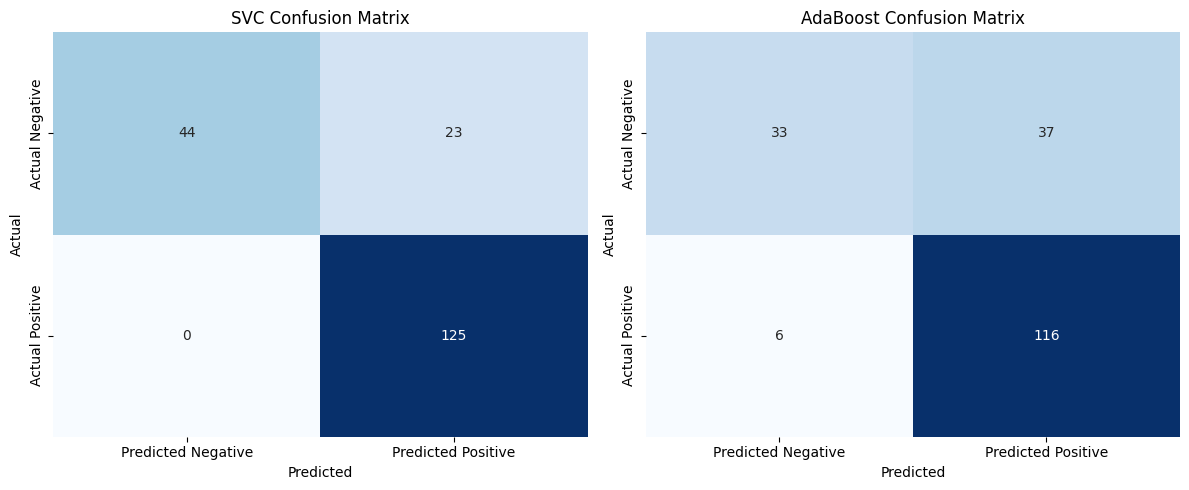

In [69]:
import seaborn as sns

# Confusion Matrix for Random Forest
conf_matrix_svc = confusion_matrix(y_test_svc, y_pred_svc)

# Confusion Matrix for AdaBoost
conf_matrix_ab = confusion_matrix(y_test_ab, y_pred_ab)

# Plot Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0],
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('SVC Confusion Matrix')

sns.heatmap(conf_matrix_ab, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1],
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('AdaBoost Confusion Matrix')

plt.tight_layout()
plt.show()

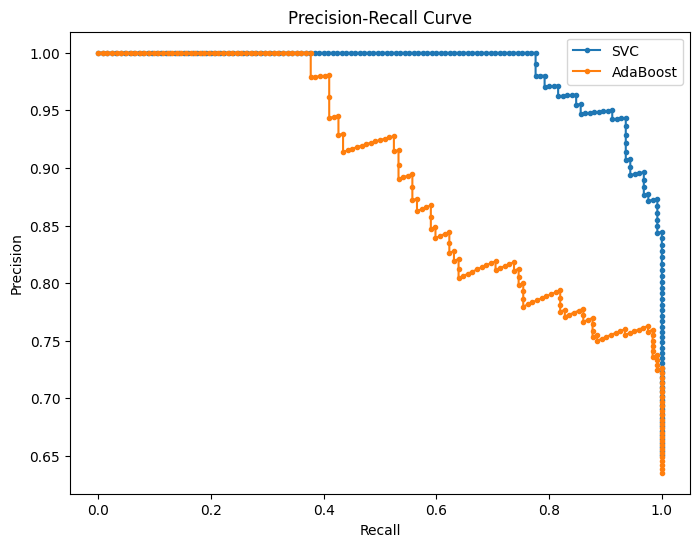

In [70]:
# Precision-Recall Curve
precision_svc, recall_svc, _ = precision_recall_curve(y_test_svc, y_pred_proba_svc)
precision_ab, recall_ab, _ = precision_recall_curve(y_test_ab, y_pred_proba_ab)

plt.figure(figsize=(8, 6))
plt.plot(recall_svc, precision_svc, marker='.', label='SVC')
plt.plot(recall_ab, precision_ab, marker='.', label='AdaBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

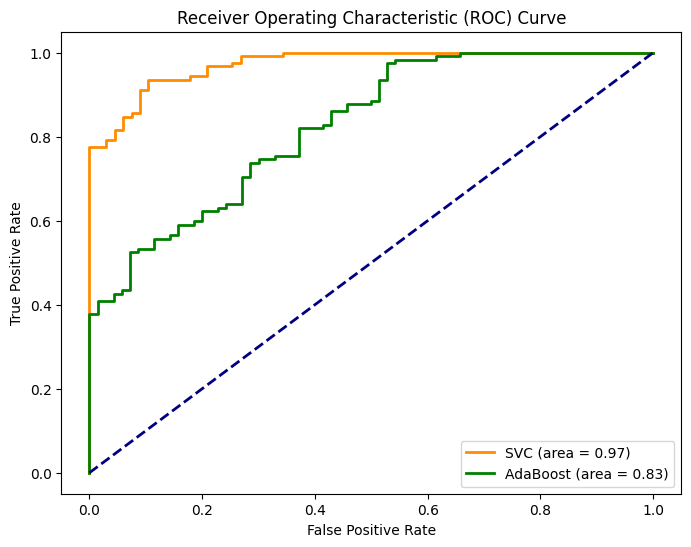

In [71]:
# ROC Curve
fpr_svc, tpr_svc, _ = roc_curve(y_test_svc, y_pred_proba_svc)
fpr_ab, tpr_ab, _ = roc_curve(y_test_ab, y_pred_proba_ab)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, color='darkorange', lw=2, label='SVC (area = %0.2f)' % roc_auc_score(y_test_svc, y_pred_proba_svc))
plt.plot(fpr_ab, tpr_ab, color='green', lw=2, label='AdaBoost (area = %0.2f)' % roc_auc_score(y_test_ab, y_pred_proba_ab))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [72]:
import pickle

with open("svc-model.pckl", "wb") as f:
  pickle.dump(svc, f)

In [73]:
with open("svc-model.pckl", "rb") as f:
  loaded_svc_model = pickle.load(f)

In [74]:
y_pred_loaded_svc = loaded_svc_model.predict(X_test_svc)
y_pred_proba_loaded_svc = loaded_svc_model.predict_proba(X_test_svc)[:, 1]

print("SVC Model (Loaded)")
print(f"Accuracy: {accuracy_score(y_test_svc, y_pred_loaded_svc)}")
print(classification_report(y_test_svc, y_pred_loaded_svc))
print(f"ROC-AUC: {roc_auc_score(y_test_svc, y_pred_proba_loaded_svc)}")

SVC Model (Loaded)
Accuracy: 0.8802083333333334
              precision    recall  f1-score   support

           0       1.00      0.66      0.79        67
           1       0.84      1.00      0.92       125

    accuracy                           0.88       192
   macro avg       0.92      0.83      0.85       192
weighted avg       0.90      0.88      0.87       192

ROC-AUC: 0.9728955223880598
